In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('multi_classification_train.csv')
split = 0.8
s = int((dataset.values.shape[0])*split)
x_data = dataset.values[:s,1:21]
y_data = dataset.values[:s,21]
x_cv = dataset.values[s:,1:21]
y_cv = dataset.values[s:,21]

dataset = pd.read_csv('multi_classification_test.csv')
x_test = dataset.values[:,1:21]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          12000 non-null  int64  
 1   Feature_1   12000 non-null  float64
 2   Feature_2   12000 non-null  float64
 3   Feature_3   12000 non-null  float64
 4   Feature_4   12000 non-null  float64
 5   Feature_5   12000 non-null  float64
 6   Feature_6   12000 non-null  float64
 7   Feature_7   12000 non-null  float64
 8   Feature_8   12000 non-null  float64
 9   Feature_9   12000 non-null  float64
 10  Feature_10  12000 non-null  float64
 11  Feature_11  12000 non-null  float64
 12  Feature_12  12000 non-null  float64
 13  Feature_13  12000 non-null  float64
 14  Feature_14  12000 non-null  float64
 15  Feature_15  12000 non-null  float64
 16  Feature_16  12000 non-null  float64
 17  Feature_17  12000 non-null  float64
 18  Feature_18  12000 non-null  float64
 19  Feature_19  12000 non-nul

In [ ]:
"""
#feature scaling method 1
x_data/= x_data.max(axis=0)
print(x_data)
"""

'\n#feature scaling method 1\nx_data/= x_data.max(axis=0)\nprint(x_data)\n'

In [ ]:
"""
#feature scaling method 2
x_data = (x_data - np.mean(x_data,axis = 0))/(x_data.max(axis=0)-x_data.min(axis=0))
print(x_data)
"""

'\n#feature scaling method 2\nx_data = (x_data - np.mean(x_data,axis = 0))/(x_data.max(axis=0)-x_data.min(axis=0))\nprint(x_data)\n'

In [ ]:
#feature scaling method 3 (Z-Score)
m = np.mean(x_data, axis = 0)
s = np.std(x_data ,axis = 0)
def f_scale3(x,m,s):
    std=s
    x_f=(x - m)/(std+1e-8)
    return x_f
x_data = f_scale3(x_data,m,s)
x_cv = f_scale3(x_cv,m,s)
x_test = f_scale3(x_test,m,s)
print(x_data)

[[-0.56488872 -0.57820578 -2.16290657 ...  0.67864404  1.72801069
   1.45603028]
 [-0.91892718  0.21608316  0.5446508  ... -0.03521113 -0.99003088
   0.44359733]
 [ 2.65628932 -0.97071515 -1.22114087 ... -3.36748983  1.42238931
   0.70411586]
 ...
 [-0.11135634  0.89055778 -0.4275746  ...  1.50988461  0.52427229
   1.03484896]
 [ 0.06017035  0.60020986  0.23548236 ... -0.01446352  0.23353392
   0.25464   ]
 [ 0.91440923 -0.59561716 -0.59990516 ...  0.20773816  0.63044151
   0.17433106]]


In [ ]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

In [ ]:
def knn(x_train, y_train, x_test, k):
    distances = np.linalg.norm(x_test[:, np.newaxis] - x_train, axis=2)
    k_nearest_indices = np.argsort(distances, axis=1)[:, :k]
    k_nearest = y_train[k_nearest_indices].astype(int)
    y_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=k_nearest)
    return y_pred

In [ ]:
def knn_batched(x_train, y_train, x_test, k, batch_size=64):
    num_batches = (len(x_test) + batch_size - 1) // batch_size
    y_pred = []
    for i in range(num_batches):
        start = i * batch_size
        end = min((i + 1) * batch_size, len(x_test))
        batch_pred = knn(x_train, y_train, x_test[start:end], k)
        y_pred.append(batch_pred)
    return np.concatenate(y_pred)

In [ ]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

In [ ]:
def f1_score(y_predic, y_true):
    tp = np.sum((y_true == 1) & (y_predic == 1))
    fp = np.sum((y_true == 0) & (y_predic == 1))
    fn = np.sum((y_true == 1) & (y_predic == 0))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    if precision + recall == 0:
        return 0
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

Predicted labels: [0 1 3 ... 2 4 1]
Accuracy: 94.80638409209837 %
F1 score: 0.9934229339433801


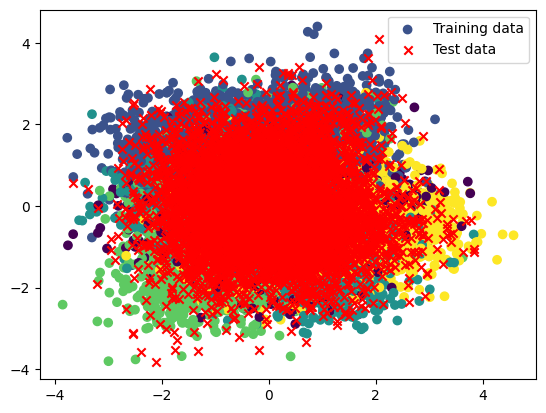

In [ ]:
k = 3
y_pred = knn_batched(x_data, y_data, x_cv, k, 64)
print("Predicted labels:", y_pred)
print("Accuracy:", accuracy(y_cv, y_pred), "%")
print("F1 score:", f1_score(y_pred, y_cv))

plt.figure()
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap='viridis', label='Training data')
plt.scatter(x_cv[:, 0], x_cv[:, 1], c='red', marker='x', label='Test data')
plt.legend()
plt.show()

In [ ]:
test_pred = knn_batched(x_data, y_data, x_test, k, 64)
print("Predicted labels:", test_pred)

Predicted labels: [3 1 1 ... 3 4 1]


In [ ]:
y_test_pred_df = pd.DataFrame(test_pred, columns=["Predicted"])
y_test_pred_df.to_csv("y_test_pred.csv", index=False)

print("Predictions saved to 'y_test_pred.csv'.")

Predictions saved to 'y_test_pred.csv'.
